In [1]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [2]:
mat = np.load(r"..\matrices\isolated-materials\float32\Material2.npy")
img = mat[:,:,200]

(1085, 1085, 251)


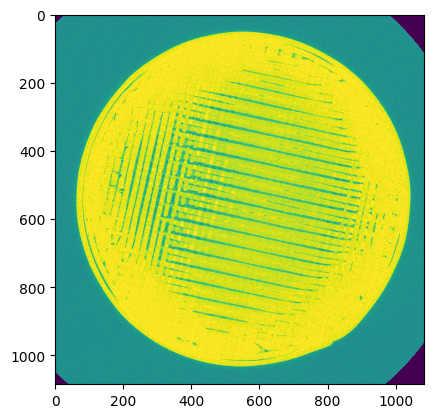

In [26]:
print(mat.shape)
plt.imshow(mat[:,:,200], vmin=8000, vmax=12000)
plt.show()


Needs to accept seed locations of arbitrary amounts, keep track of which voxels are marked/unmarked, etc


In [90]:
# Testing 2D case
seeds = {(175,316,3),
         (0,1084,1),
         (200,100,2),
         (100,1000,2),
         (1000,950,2),
         (1000,100,2),
         (350,900,3),
         (950,400,3),
         (0,0,1),
         (1084,0,1),
         (1084,1084,1)}
bounds = [[0, 9000],
         [9400, 10400],
         [11100, 13000]]
active = seeds
marked = np.zeros(img.shape, dtype=np.uint8)

# x, y, and m for material
for x,y,m in seeds:
    marked[x,y] = m


In [101]:
for _ in range(100):
    for x,y,m in active.copy():
        vs = np.zeros(4, dtype=np.uint8)
        gs = np.ones(4) * 1e12
        nexts = np.zeros(4)

        current = img[x,y]
        lower = bounds[m-1][0]
        upper = bounds[m-1][1]

        for n in [0,1,2,3]:
            try:
                if n==0:
                    vs[n] = marked[x-1, y]
                    nexts[n] = img[x-1, y]
                elif n==1:
                    vs[n] = marked[x+1, y]
                    nexts[n] = img[x+1, y]
                elif n==2:
                    vs[n] = marked[x, y-1]
                    nexts[n] = img[x, y-1]
                elif n==3:
                    vs[n] = marked[x, y+1]
                    nexts[n] = img[x, y+1]
            except IndexError:
                vs[n] = 255

        if vs[0] != 0 and vs[1] != 0 and vs[2] != 0 and vs[3] != 0:
            active.remove((x,y,m))
            continue
        
        for n in [0,1,2,3]:
            if not vs[n] and vs[n] != 255:
                next = nexts[n]
                if lower <= next <= upper:
                    gs[n] = np.abs(current-next)
                else:
                    gs[n] = np.inf

        i = np.argmin(gs)
        if gs[i] == np.inf:
            active.remove((x,y,m))
            continue
        if i == 0: 
            marked[x-1,y] = m
            active.add((x-1,y,m))
        elif i == 1:
            marked[x+1,y] = m
            active.add((x+1,y,m))
        elif i == 2:
            marked[x,y-1] = m
            active.add((x,y-1,m))
        elif i == 3:
            marked[x,y+1] = m
            active.add((x,y+1,m))

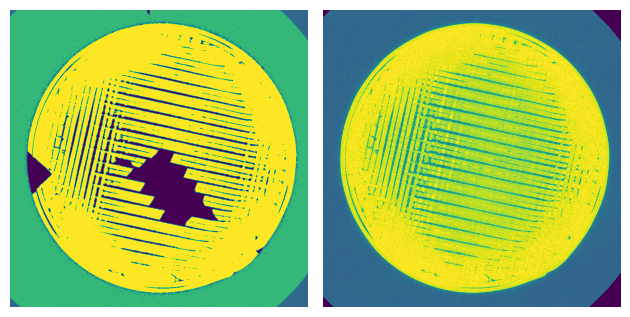

In [102]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(marked)
axs[1].imshow(img, vmin=9000, vmax=12000)
axs[0].axis(False)
axs[1].axis(False)
fig.tight_layout()
plt.show()

In [ ]:
print(active)